In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from diffusers import DiffusionPipeline, FluxPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16)



/Users/damian/2.current/compel/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]`torch_dtype` is deprecated! Use `dtype` instead!
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 15.05it/s]


In [6]:
pipe = pipe.to('mps')

In [7]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"


In [6]:
image = pipe(prompt, num_inference_steps=4).images[0]

100%|██████████| 4/4 [09:45<00:00, 146.41s/it]


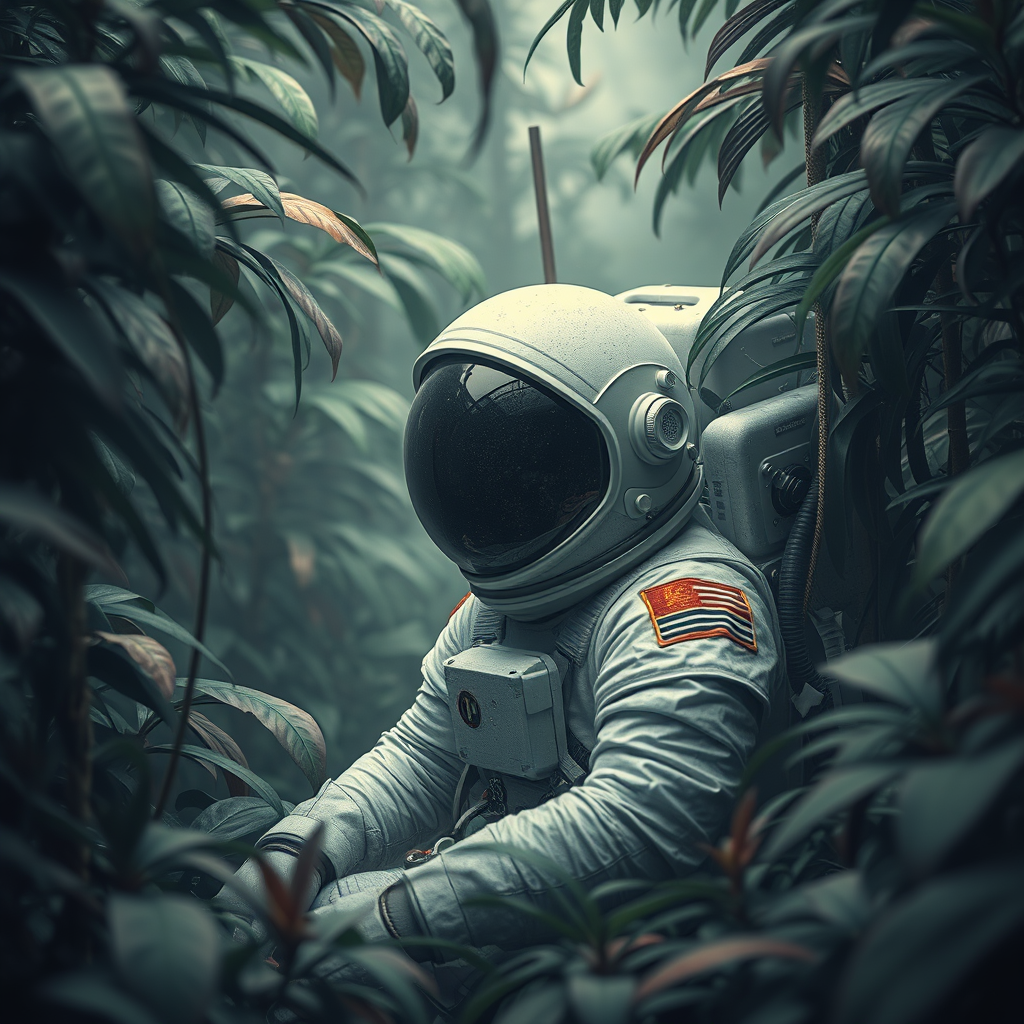

In [7]:
display(image)

In [19]:
print(pipe.tokenizer_2.tokenize("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"))
pipe.tokenizer_2("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k")


['▁Astro', 'naut', '▁in', '▁', 'a', '▁jungle', ',', '▁cold', '▁color', '▁palette', ',', '▁mu', 'ted', '▁colors', ',', '▁detailed', ',', '▁8', 'k']


{'input_ids': [15001, 15785, 16, 3, 9, 19126, 6, 2107, 945, 12970, 6, 4035, 1054, 2602, 6, 3117, 6, 505, 157, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [33]:
generator = torch.Generator().manual_seed(42)
image = pipe(prompt, num_inference_steps=4, width=512, height=512, generator=generator).images[0]
image

/Users/damian/2.current/compel/.venv/lib/python3.12/site-packages/diffusers/configuration_utils.py:141: FutureWarning: Accessing config attribute `__len__` directly via 'FluxPipeline' object attribute is deprecated. Please access '__len__' over 'FluxPipeline's config object instead, e.g. 'scheduler.config.__len__'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
/Users/damian/2.current/compel/.venv/lib/python3.12/site-packages/diffusers/configuration_utils.py:141: FutureWarning: Accessing config attribute `__len__` directly via 'FluxPipeline' object attribute is deprecated. Please access '__len__' over 'FluxPipeline's config object instead, e.g. 'scheduler.config.__len__'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
  0%|          | 0/4 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [5]:
from compel import CompelForFlux
from diffusers import FluxPipeline

compel = CompelForFlux(pipe=pipe)
pooled_prompt_embeds, prompt_embeds = compel("Astronaut+ in a jungle-, cold color palette, muted colors, detailed, 8k")



In [6]:
prompt_embeds

tensor([[[-0.0521,  0.0987,  0.0415,  ..., -0.0592,  0.2323, -0.0649],
         [ 0.0575,  0.0004,  0.1179,  ...,  0.0252,  0.1673, -0.0703],
         [-0.0605, -0.0478,  0.0907,  ...,  0.0441, -0.0668,  0.0615],
         ...,
         [ 0.0615, -0.0134,  0.0495,  ..., -0.0021, -0.0469, -0.0209],
         [ 0.1310, -0.0022, -0.0325,  ..., -0.0657, -0.0724, -0.0218],
         [ 0.0062,  0.0112, -0.0101,  ..., -0.0018, -0.0170,  0.0096]]],
       device='mps:0')

In [29]:
pooled_prompt_embeds.shape, prompt_embeds.shape

(torch.Size([1, 768]), torch.Size([1, 512, 4096]))

100%|██████████| 4/4 [01:04<00:00, 16.09s/it]


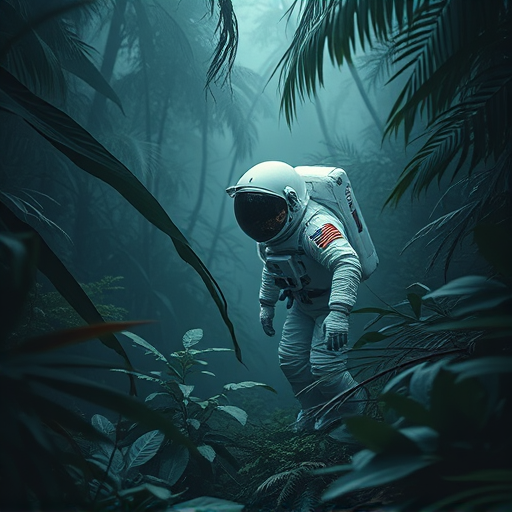

In [8]:
generator = torch.Generator().manual_seed(42)
image = pipe(prompt,
             num_inference_steps=4, width=512, height=512, generator=generator).images[0]
image


100%|██████████| 4/4 [00:39<00:00,  9.93s/it]


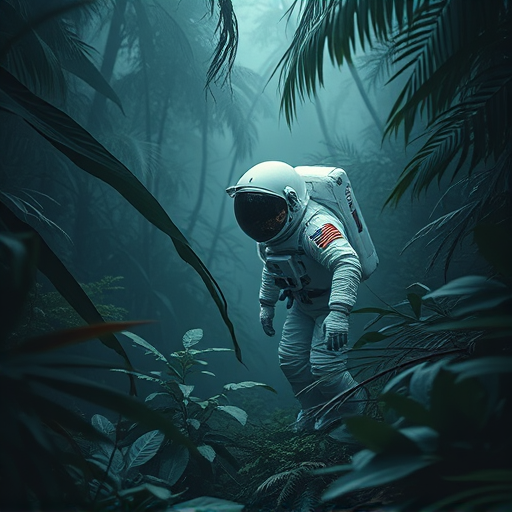

In [7]:

pipe: FluxPipeline
generator = torch.Generator().manual_seed(42)
compel = CompelForFlux(pipe=pipe)
pooled_prompt_embeds, prompt_embeds = compel(prompt)
image = pipe(pooled_prompt_embeds=pooled_prompt_embeds,
             prompt_embeds=prompt_embeds,
             num_inference_steps=4, width=512, height=512, generator=generator).images[0]
image

In [8]:
from typing import Union, List
from compel import Compel
from diffusers import FluxPipeline

class CompelForFlux:
    def __init__(self, pipe: FluxPipeline):
        self.compel_1 = Compel(tokenizer=pipe.tokenizer, text_encoder=pipe.text_encoder, requires_pooled=True)
        self.compel_2 = Compel(tokenizer=pipe.tokenizer_2, text_encoder=pipe.text_encoder_2)

    def __call__(self, prompt: Union[str, List[str]]):
        _, pooled_embeds = self.compel_1(prompt)
        embeds = self.compel_2(prompt)
        return pooled_embeds, embeds

with torch.no_grad():
    compel = CompelForFlux(pipe=pipe)
    pooled_prompt_embeds, prompt_embeds = compel("Astronaut+ in a jungle-, cold color palette, muted colors, detailed, 8k")
    print(prompt_embeds)



KeyboardInterrupt: 

In [ ]:
with torch.no_grad():
    prompt_embeds = torch.Tensor(prompt_embeds.detach().clone().cpu().tolist()).to(device=prompt_embeds.device, dtype=prompt_embeds.dtype)
    pooled_prompt_embeds = torch.Tensor(pooled_prompt_embeds.detach().clone().cpu().tolist()).to(device=pooled_prompt_embeds.device, dtype=pooled_prompt_embeds.dtype)

    generator = torch.Generator().manual_seed(42)
    image = pipe(pooled_prompt_embeds=pooled_prompt_embeds,
                 prompt_embeds=prompt_embeds,
                 num_inference_steps=4, width=512, height=512, generator=generator).images[0]
image

In [ ]:

pipe: FluxPipeline
generator = torch.Generator().manual_seed(42)
#compel = CompelForFlux(pipe=pipe)
#pooled_prompt_embeds, prompt_embeds = compel(prompt)
image = pipe(pooled_prompt_embeds=pooled_prompt_embeds,
             prompt_embeds=prompt_embeds,
             num_inference_steps=4, width=512, height=512, generator=generator).images[0]
image

  0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
embeds_1.shape, embeds_2.shape

(torch.Size([1, 77, 768]), torch.Size([1, 512, 4096]))

In [7]:
device = 'mps'
text_input_ids = pipe.tokenizer_2(prompt, padding="longest", return_tensors="pt").input_ids
text_embeds = pipe.text_encoder_2(text_input_ids.to(pipe.device), output_hidden_states=False)[0]
text_embeds.shape

torch.Size([1, 20, 4096])

In [8]:
pipe.tokenizer

CLIPTokenizer(name_or_path='/Users/damian/.cache/huggingface/hub/models--black-forest-labs--FLUX.1-schnell/snapshots/741f7c3ce8b383c54771c7003378a50191e9efe9/tokenizer', vocab_size=49408, model_max_length=77, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	49406: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	49407: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [9]:
dir(pipe)


['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculate_module_shape',
 '_callback_tensor_inputs',
 '_check_text_inv_inputs',
 '_control_lora_supported_norm_keys',
 '_current_timestep',
 '_deprecated_kwargs',
 '_dict_from_json_file',
 '_exclude_from_cpu_offload',
 '_execution_device',
 '_extend_tokens_and_embeddings',
 '_get_clip_prompt_embeds',
 '_get_config_file_from_dduf',
 '_get_init_keys',
 '_get_signature_keys',
 '_get_signature_types',
 '_get_t5_prompt_embeds',
 '_guidance_scale',
 '_internal_dict',
 '_interrupt',
 '_is_onnx',
 '_joint_attention_kwargs',
 '_load_connected_pipes',
 '_load_norm_into_transformer',
 

In [12]:
type(pipe.tokenizer), type(pipe.tokenizer_2), type(pipe.text_encoder), type(pipe.text_encoder_2)

(transformers.models.clip.tokenization_clip.CLIPTokenizer,
 transformers.models.t5.tokenization_t5_fast.T5TokenizerFast,
 transformers.models.clip.modeling_clip.CLIPTextModel,
 transformers.models.t5.modeling_t5.T5EncoderModel)